Nama&emsp;&emsp;&ensp;: Muhammad Nadhif Taher Ahmad \
NIM&emsp;&emsp;&ensp;&ensp;&nbsp;: 12918009 \
Universitas : ITB



*   tanggal memulai : 14 November 2020
*   Sumber dataset  : Takemeout.csv
*   Keterangan :





tahapan analisis menggunakan bahasa indonesia

#Inisiasi Data

Keterangan:

*   Digunakan data takemout.csv (TakeMeOut)
*   Tidak digunakan dataset lain karena kemungkinan sudah ada yang buat modelnya dan data dari OkCupid bisa dikatakan tidak legal dan sudah ada yang menyajikkan analisisnya di researchgate.

Permisi, untuk pertemuan berikutnya mungkin bisa membahas tentang legalitas dan lisensi.


In [1]:
#inisiasi library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

In [2]:
#dapatkan data ke bentuk pandas
#ya, tentu saja digunakan data takemeout
raw=pd.read_csv("/content/takemeout.csv")

#periksa data
raw.head(2)

,Timestamp,Siapa nama kamu?,Cewek atau cowok nih?,Seberapa penting quality time bareng calon pacar untuk kamu?,Seberapa penting physical touch sama calon pacar untuk kamu?,Seberapa penting word of affirmation dari calon pacar untuk kamu?,Seberapa penting dapet kado dari calon pacar untuk kamu?,Seberapa penting bantuan dari calon pacar untuk kamu?
0,2020/10/31 3:39:25 PM GMT+7,A**************,Cowok,5,5,4,1,3
1,2020/10/31 3:39:36 PM GMT+7,L****,Cewek,5,5,3,2,2


In [3]:
#karena nama kolomnya kepanjangan dan terdapat spasi
#maka, untuk memudahkan pengolahan
#nama kolom diganti 

dt=raw.rename(columns={"Siapa nama kamu?": "Nama",
                   "Cewek atau cowok nih?": "Sex",
                   "Seberapa penting quality time bareng calon pacar untuk kamu?":"Quality_time",
                   "Seberapa penting physical touch sama calon pacar untuk kamu?":"Affection",
                   "Seberapa penting word of affirmation dari calon pacar untuk kamu?":"Affirmation",
                   "Seberapa penting dapet kado dari calon pacar untuk kamu?":"Attention",
                   "Seberapa penting bantuan dari calon pacar untuk kamu?":"Support"
                   })
dt.head(2)

,Timestamp,Nama,Sex,Quality_time,Affection,Affirmation,Attention,Support
0,2020/10/31 3:39:25 PM GMT+7,A**************,Cowok,5,5,4,1,3
1,2020/10/31 3:39:36 PM GMT+7,L****,Cewek,5,5,3,2,2


Karena nama kolomnya kepanjangan, tentu saja nama kolom akan diganti. Digunakan kata-kata berikut untuk mengganti nama kolom dan dalam bahasa inggris karena cakupannya lebih luas. 

                   "Cewek atau cowok nih?" diganti "Sex"
Mengindikasikan jenis kelamin bawaan lahir.

                   "Seberapa penting quality time bareng calon pacar untuk kamu?" diganti "Quality_time"

Mengindikasikan pentingnya *quality time*.

                   "Seberapa penting physical touch sama calon pacar untuk kamu?" diganti "Affection"

Iya, afeksi dari pasangan. Afeksi di sini artinya perhatian secara fisik seperti sentuhan tangan, dan lain-lain.

                   "Seberapa penting word of affirmation dari calon pacar untuk kamu?" diganti "Affirmation"

Berarti pengakuan dari pasangan.

                   "Seberapa penting dapet kado dari calon pacar untuk kamu?" diganti "Attention"

Atensi. Jelas lah ya, siapa sih yang gak suka dikasih kado pas ultah UwU.

                   "Seberapa penting bantuan dari calon pacar untuk kamu?" diganti "Support"

Dukungan. Seberapa penting kamu mau punya pasangan yang saling mendukung.

#Eksplorasi Data

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Timestamp     101 non-null    object
 1   Nama          101 non-null    object
 2   Sex           101 non-null    object
 3   Quality_time  101 non-null    int64 
 4   Affection     101 non-null    int64 
 5   Affirmation   101 non-null    int64 
 6   Attention     101 non-null    int64 
 7   Support       101 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 6.4+ KB


Didapatkan bahwa tidak ada data yang null (kosong).

In [5]:
#Statistik dasar
dt.describe()

,Quality_time,Affection,Affirmation,Attention,Support
count,101.000000,101.000000,101.000000,101.000000,101.000000
mean,4.099010,3.168317,3.722772,2.732673,3.752475
std,1.212476,1.334686,1.209287,1.325829,1.143730
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,2.000000,3.000000,2.000000,3.000000
50%,5.000000,3.000000,4.000000,3.000000,4.000000
75%,5.000000,4.000000,5.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000


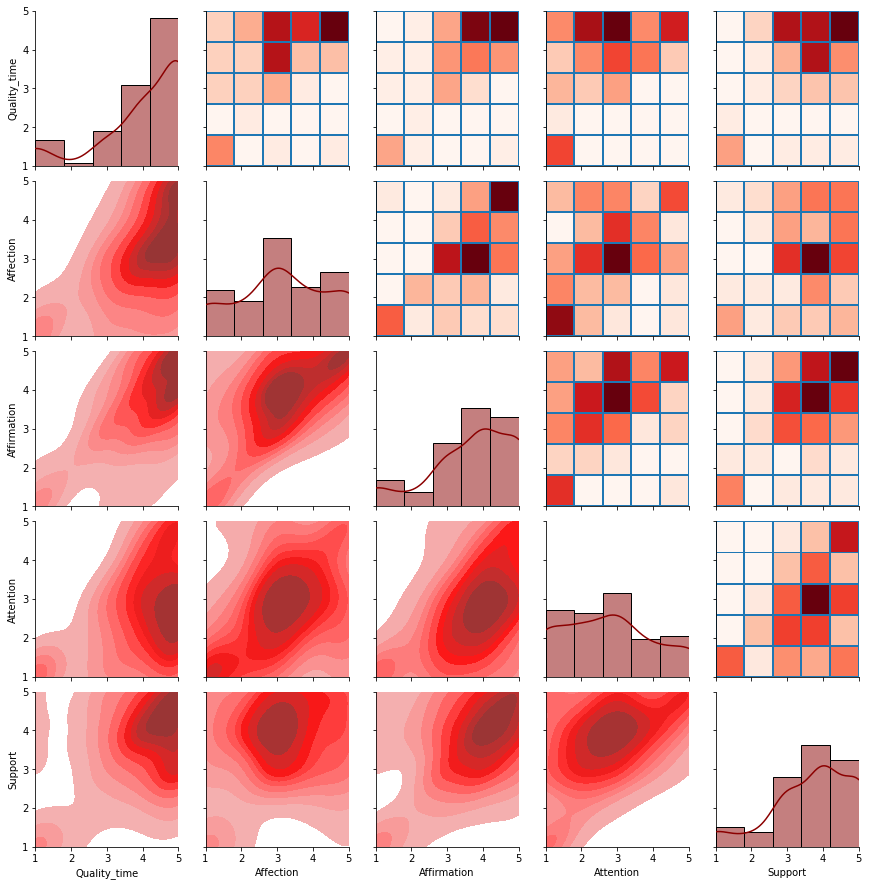

In [6]:
grid = sns.PairGrid(data= dt)
axes = grid.axes
axes[0,0].set_xlim((1,5))
axes[4,4].set_ylim((1,5))

# Map a scatter plot to the upper triangle
grid = grid.map_upper(plt.hist2d,bins=5,cmap='Reds')

# Map a histogram to the diagonal
grid = grid.map_diag(sns.histplot, bins = 5, color = 'darkred', 
                     edgecolor = 'k',kde=True,)

# Map a density plot to the lower triangle
grid = grid.map_lower(sns.kdeplot, color = 'darkred',fill=True)

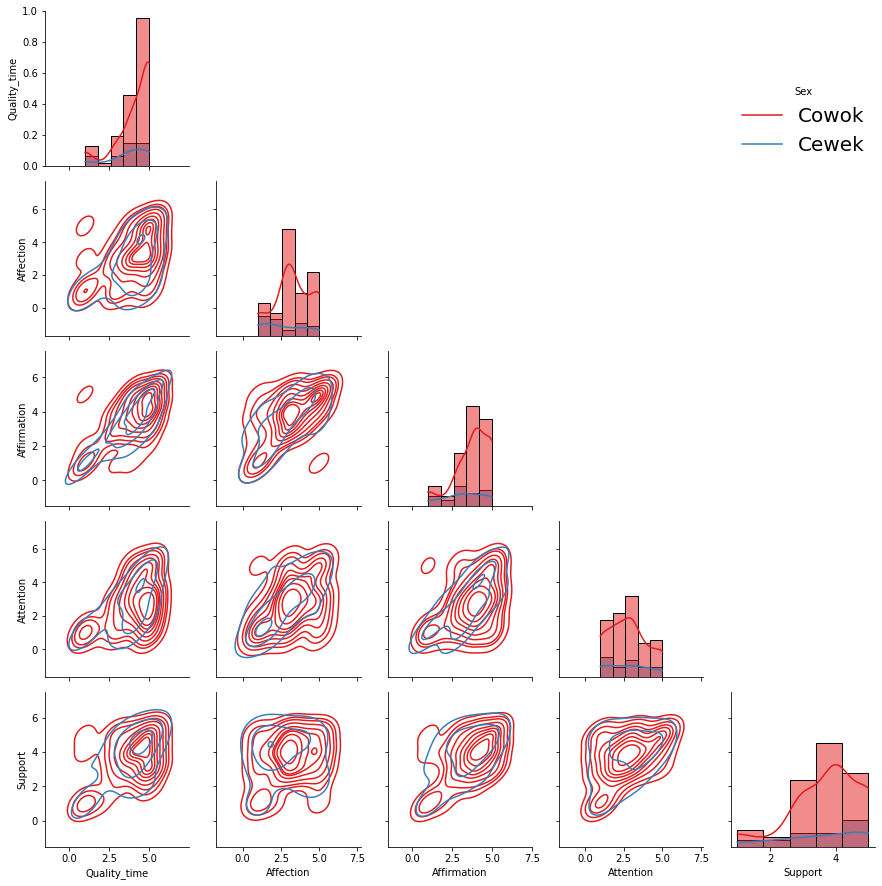

In [7]:
def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)

grid = sns.PairGrid(data= dt,hue='Sex')

# Map a histogram to the diagonal
grid = grid.map_diag(sns.histplot, bins = 5, color = 'darkred', 
                     edgecolor = 'k',kde=True,palette="Set1")

# Map a density plot to the lower triangle
grid = grid.map_lower(sns.kdeplot, palette="Set1")

# Map a scatter plot to the upper triangle
grid = grid.map_upper(hide_current_axis)

grid = grid.add_legend(fontsize=20, bbox_to_anchor=(0.85,0.85))

*   Karena datanya adalah diskrit dan ordinal maka digunakan korelasi spearman.

In [8]:
dt.corr(method='spearman')

,Quality_time,Affection,Affirmation,Attention,Support
Quality_time,1.000000,0.466393,0.531301,0.375596,0.205142
Affection,0.466393,1.000000,0.554118,0.427842,0.124222
Affirmation,0.531301,0.554118,1.000000,0.441594,0.370729
Attention,0.375596,0.427842,0.441594,1.000000,0.389016
Support,0.205142,0.124222,0.370729,0.389016,1.000000


#Persiapan Model

*   Akan dibuat kolom baru yang berisi target data untuk model statistik
*   Model yang dibentuk adalah model prediksi jenis kelamin dari pasangan yanh diidamkan.

$$
f(Sex)= \left\{
\begin{array}{}
      0 & Sex=cowok \\
      1 & Sex=cewek \\
\end{array} 
\right. 
$$



In [9]:
df=dt
df['target'] = df['Sex'].replace(['Cowok','Cewek'],[0,1])
df.head()

,Timestamp,Nama,Sex,Quality_time,Affection,Affirmation,Attention,Support,target
0,2020/10/31 3:39:25 PM GMT+7,A**************,Cowok,5,5,4,1,3,0
1,2020/10/31 3:39:36 PM GMT+7,L****,Cewek,5,5,3,2,2,1
2,2020/10/31 3:39:38 PM GMT+7,Y***********,Cowok,4,3,4,4,4,0
3,2020/10/31 3:39:42 PM GMT+7,a***,Cowok,5,5,5,2,3,0
4,2020/10/31 3:39:43 PM GMT+7,B****,Cowok,5,5,5,2,4,0


In [10]:
df=df.drop(['Timestamp', 'Nama','Sex'], axis=1)

In [22]:
#cek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Quality_time  101 non-null    int64
 1   Affection     101 non-null    int64
 2   Affirmation   101 non-null    int64
 3   Attention     101 non-null    int64
 4   Support       101 non-null    int64
dtypes: int64(5)
memory usage: 4.1 KB


#Pembuatan Model

Ambil target (validasi output)
Ambil dataset(input)

In [12]:
target = df.pop('target')

In [13]:
dataset = tf.data.Dataset.from_tensor_slices((df.values, target.values))

In [14]:
#tampilkan fitur dan target dataset
for feat, targ in dataset.take(5):
  print ('Features: {}, Target: {}'.format(feat, targ))

Features: [5 5 4 1 3], Target: 0
Features: [5 5 3 2 2], Target: 1
Features: [4 3 4 4 4], Target: 0
Features: [5 5 5 2 3], Target: 0
Features: [5 5 5 2 4], Target: 0


In [15]:
#Pisahkan data
train_dataset = dataset.shuffle(len(df)).batch(1)

Karena kasusnya adalah klasifikasi biner maka dibentuk:
Model NN dengan:

*   *Hidden layer* menggunakan *Rectified Linear Unit* (relu)
*   *Output layer* menggunakan fungsi sigmoid 



In [17]:
def get_compiled_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

In [18]:
model = get_compiled_model()
model.fit(train_dataset, epochs=10)

Epoch 1/10
101/101 [==============================] - 0s 974us/step - loss: 0.4984 - accuracy: 0.8119
Epoch 2/10
101/101 [==============================] - 0s 914us/step - loss: 0.4893 - accuracy: 0.8119
Epoch 3/10
101/101 [==============================] - 0s 890us/step - loss: 0.4830 - accuracy: 0.8020
Epoch 4/10
101/101 [==============================] - 0s 900us/step - loss: 0.4818 - accuracy: 0.8119
Epoch 5/10
101/101 [==============================] - 0s 892us/step - loss: 0.4833 - accuracy: 0.8020
Epoch 6/10
101/101 [==============================] - 0s 893us/step - loss: 0.4798 - accuracy: 0.8020
Epoch 7/10
101/101 [==============================] - 0s 1ms/step - loss: 0.4820 - accuracy: 0.8020
Epoch 8/10
101/101 [==============================] - 0s 946us/step - loss: 0.4819 - accuracy: 0.8020
Epoch 9/10
101/101 [==============================] - 0s 953us/step - loss: 0.4789 - accuracy: 0.8020
Epoch 10/10
101/101 [==============================] - 0s 888us/step - loss: 0.4811 

#Tebak-tebakan Jenis Kelamin

In [19]:
print('Masukan jawaban dalam skala [1,5] pada bilangan bulat')


a=float(input("Seberapa penting quality time bareng calon pacar untuk kamu? \n"))
b=float(input("Seberapa penting physical touch sama calon pacar untuk kamu? \n"))
c=float(input("Seberapa penting word of affirmation dari calon pacar untuk kamu? \n"))
d=float(input("Seberapa penting dapet kado dari calon pacar untuk kamu? \n"))
e=float(input("Seberapa penting bantuan dari calon pacar untuk kamu? \n"))

A=[[a,b,c,d,e]]
predictions = model.predict(A)
print('Kamu adalah???')


if predictions<0.5:
  print('Cowok')
else:
  print('Cewek')

Masukan jawaban dalam skala [1,5] pada bilangan bulat
Seberapa penting quality time bareng calon pacar untuk kamu? 
5
Seberapa penting physical touch sama calon pacar untuk kamu? 
5
Seberapa penting word of affirmation dari calon pacar untuk kamu? 
5
Seberapa penting dapet kado dari calon pacar untuk kamu? 
5
Seberapa penting bantuan dari calon pacar untuk kamu? 
5
Kamu adalah???
cowok


#Analisis

Analisis data set
Diasumsikan persepsi dari pertanyaan yang ditanyakan oleh Kak Bethea sama dengan yang dijawab peserta. Dengan kata lain mengabaikan bias persepsi linguistik dari dataset karena kesalahan persepsi pertanyaan.

In [23]:
df.describe()

,Quality_time,Affection,Affirmation,Attention,Support
count,101.000000,101.000000,101.000000,101.000000,101.000000
mean,4.099010,3.168317,3.722772,2.732673,3.752475
std,1.212476,1.334686,1.209287,1.325829,1.143730
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,2.000000,3.000000,2.000000,3.000000
50%,5.000000,3.000000,4.000000,3.000000,4.000000
75%,5.000000,4.000000,5.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000


*   Semua data menunjukkan jumlah data yang sama yaitu 101 buah. Oleh karena itu, data bisa dianggap kurang represntatif untuk menjelaskran karakteristik manusia secara keseluruhan (101/populasi manusia) atau pun pada skala mahasiswa ITB (101/kisaran 18000 siswa). Namun, dapat dikatakan bahwa data cukup baik untuk menggambarkan peserta GDSC-ITB 2020/2021 (kurang lebih 130 orang). Sehingga analisis dibatasi untuk 
*   Quality time,	Affirmation, dan	Support memiliki rata-rata di sekitar angka 4 (ingin). Sementara Affection	dan	Attention memiliki rata-rata di sekitar angka 3 (biasa aja)
*    Kelima parameter memiliki nilai (Quality time,	Affection,	Affirmation,	Attention,	Support) standar deviasi yang relatif sama ada disekitar 1.2.

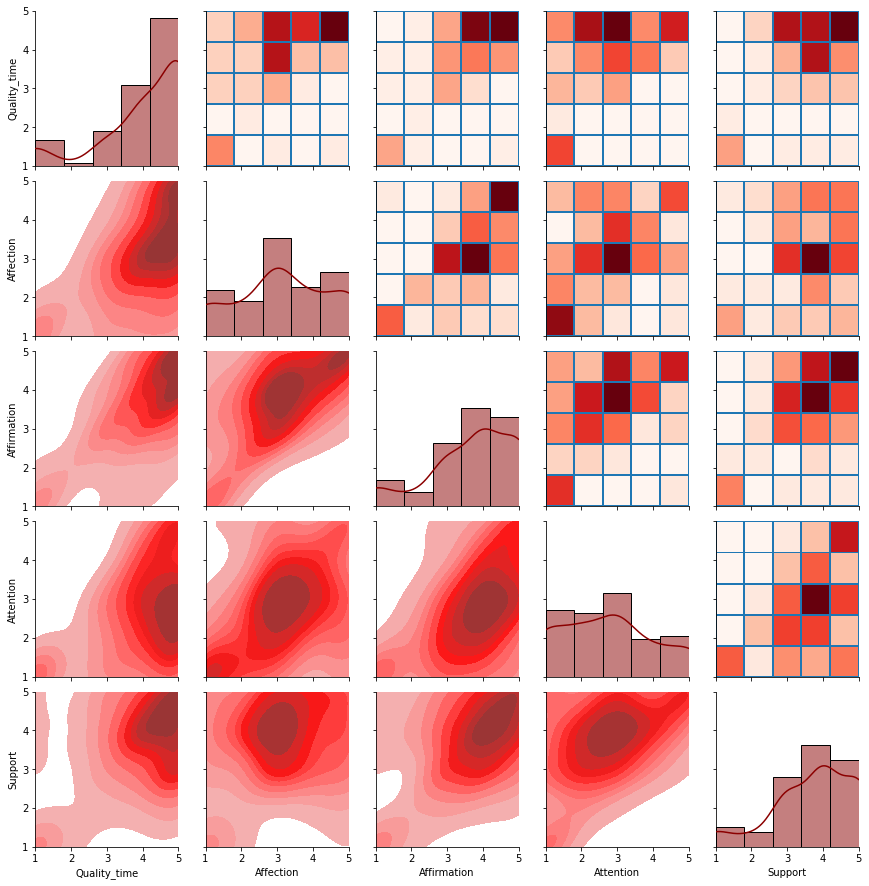

Histogram



*   Distribusi data sampel untuk parameter Affirmation dan Support bisa dikatakan cenderung sama dengan pusat di 4. Cenderung mirip dengan parameter quality time.
*   Distribusi data sampel untuk parameter Affection dan Attention bisa dikatakan cenderung sama dengan pusat di 3. Bentuknya cenderung mirip dengan disribusi uniform.



Histogram 2D

keterangan: semakin gelap-merah warnanya semakin banyak frekuensi kejadiannya.

*   Data banyak yang terpusat di koordinat 5,5. Dengan kata lain, banyak responden yang menginginkan pasangan yang memenuhi lima parameter itu.
*   Responden menginkan quality time yang baik dengan pasangannya. Mereka juga butuh affirmation dan support yang lebih. Hal ini bisa dikarenakan tuntutan dari kuliah di ITB yang berat. Support, affirmation, dan quality time dari pasangan dapat menjadi support system bagi seseorang ketika kuliah.



KDE plot

*   Dapat dilihat bahwa distribusi data tersebar secara diagonal. Dengan meninjau frekuesnsi juga dapat dikatakan bahwa peluang 5 parameter ini adalah dependen, diskrit, dan ordinal. Oleh karena itu (karena ordinal dan diskrit), menggunakan distribusi spearman.  
*   Terdapat beberapa kelompok data yang terpisah dari data lainnya. Seperti pada matriks quality time dan support. 
* Untuk parameter atensi dan afeksi pusat data cenderung ditengah. Sehingga, memungkinkan rata-rata distribusinya ada di tengah juga.


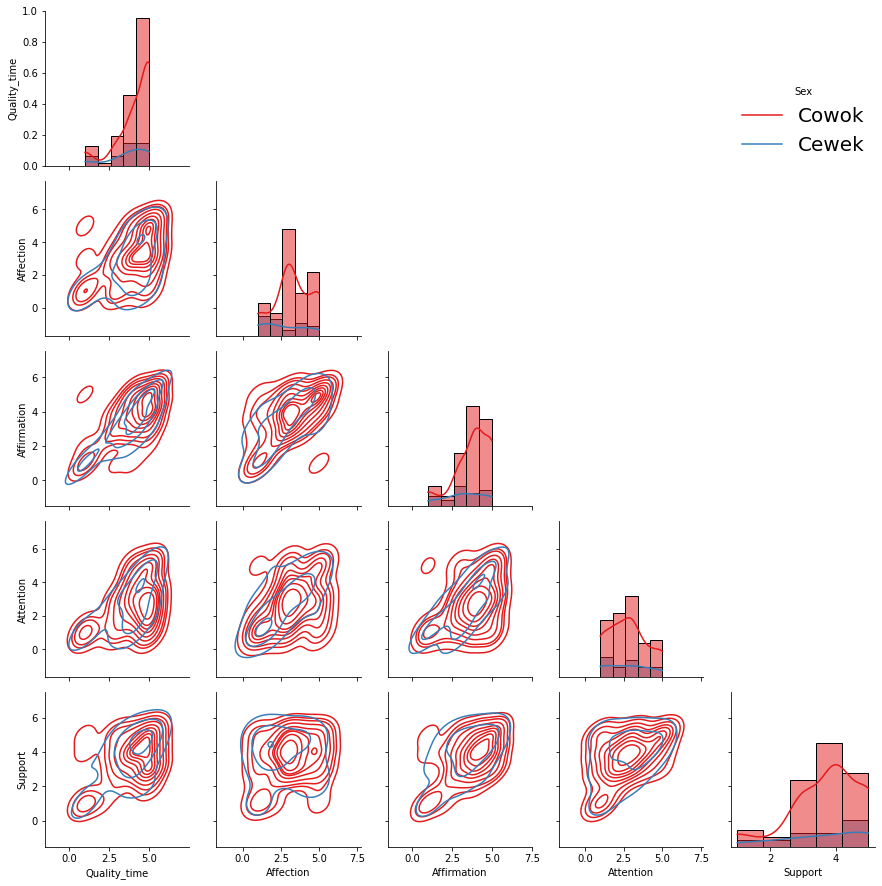




*   Tinjau grafik di atas menunjukkan bahwa distribusi statistik dua variabel (lower diagonal), parameter antara cowok dan cewek relatif sama, meskipun jumlah populasi mereka (cowok dan cewek) berbeda.
*   Terdapat juga beberapa pecilan golongan pria dengan meninjau plot diagonal bawah. Seperti golongan yang memilih affection di skala 5 dan affirmation di 5.
* Plot distribusi histogram (diagonal utama) cewek juga menunjukkan karakteristik distribusi uniform untuk cewek.


In [25]:
df.corr(method='spearman')

,Quality_time,Affection,Affirmation,Attention,Support
Quality_time,1.000000,0.466393,0.531301,0.375596,0.205142
Affection,0.466393,1.000000,0.554118,0.427842,0.124222
Affirmation,0.531301,0.554118,1.000000,0.441594,0.370729
Attention,0.375596,0.427842,0.441594,1.000000,0.389016
Support,0.205142,0.124222,0.370729,0.389016,1.000000


Korelasi masing-masing variabel menunjukkan tidak adanya korelasi yang mendekati satu. Artinya keterhubungan kelima parameter yang ada tidak ada yang baik. Nilai korelasi tertinggi ada untuk parameter Affection dan Affirmation. 

Dilakukan 10 epoch untuk menlatih model. Dengan akurasi model adalah disekita 0.8.